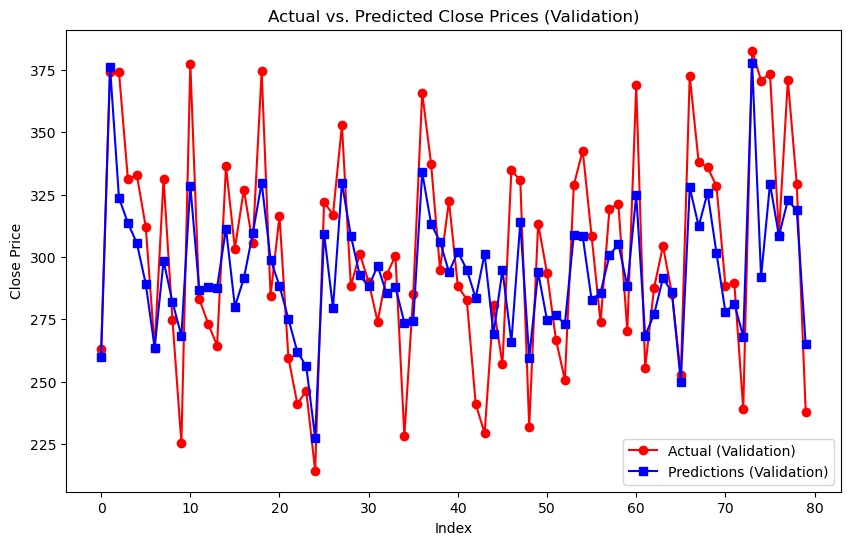

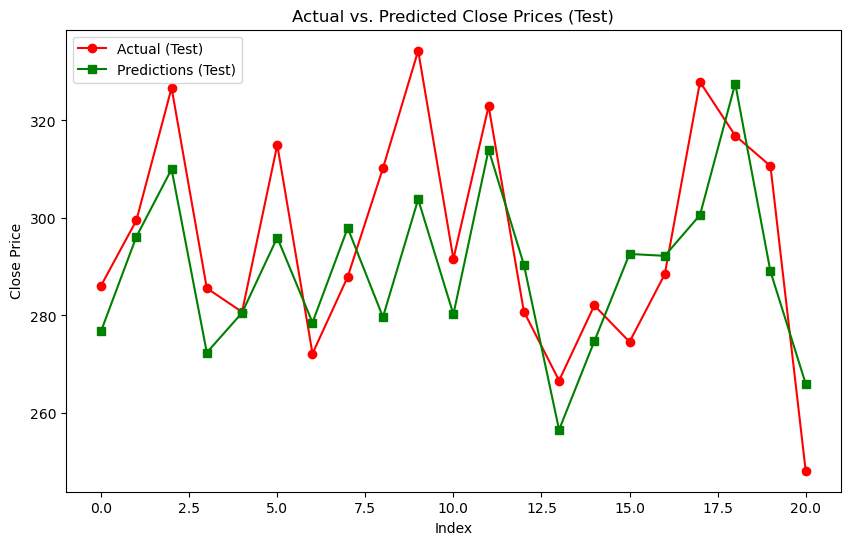

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\DELL\Downloads\microsoftdata.csv'
data = pd.read_csv(file_path)

# Feature engineering: Extract year, month, and day from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target variable
X = data[['Year', 'Month', 'Day']]
y = data['Close']

# Split the data into training and a combined set of validation and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation and test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
predictions_validation = knn_regressor.predict(X_validation)

# Make predictions on the test set
predictions_test = knn_regressor.predict(X_test)

# Visualize actual versus predicted values for validation set
plt.figure(figsize=(10, 6))
plt.plot(y_validation.values, color='red', label='Actual (Validation)', marker='o')
plt.plot(predictions_validation, color='blue', label='Predictions (Validation)', marker='s')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs. Predicted Close Prices (Validation)')
plt.show()

# Visualize actual versus predicted values for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, color='red', label='Actual (Test)', marker='o')
plt.plot(predictions_test, color='green', label='Predictions (Test)', marker='s')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.title('Actual vs. Predicted Close Prices (Test)')
plt.show()


Validation Results:
MSE: 778.63
MAE: 22.52
R-squared: 0.58
MAPE: 7.47%

Test Results:
MSE: 254.91
MAE: 13.60
R-squared: 0.49
MAPE: 4.53%



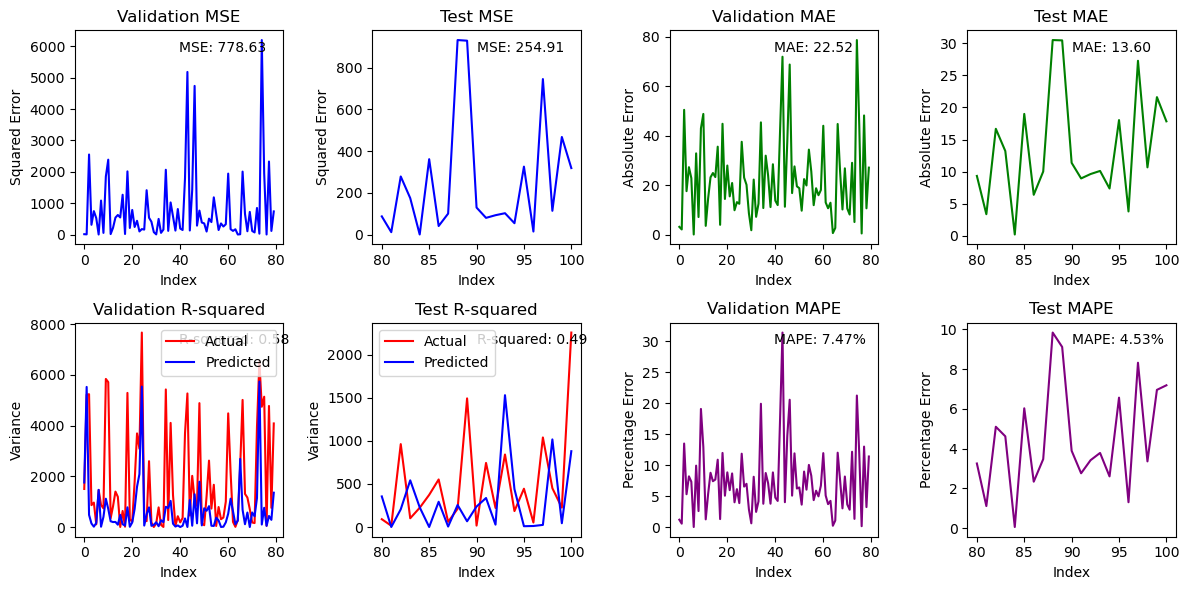

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\DELL\Downloads\microsoftdata.csv'
data = pd.read_csv(file_path)

# Feature engineering: Extract year, month, and day from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target variable
X = data[['Year', 'Month', 'Day']]
y = data['Close']

# Split the data into training and a combined set of validation and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation and test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
predictions_validation = knn_regressor.predict(X_validation)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, predictions_validation)
mae_validation = mean_absolute_error(y_validation, predictions_validation)
r2_validation = knn_regressor.score(X_validation, y_validation)
mape_validation = (np.abs((y_validation - predictions_validation) / y_validation)).mean() * 100

# Make predictions on the test set
predictions_test = knn_regressor.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = knn_regressor.score(X_test, y_test)
mape_test = (np.abs((y_test - predictions_test) / y_test)).mean() * 100

# Print the results
print("Validation Results:")
print(f"MSE: {mse_validation:.2f}")
print(f"MAE: {mae_validation:.2f}")
print(f"R-squared: {r2_validation:.2f}")
print(f"MAPE: {mape_validation:.2f}%\n")

print("Test Results:")
print(f"MSE: {mse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")
print(f"MAPE: {mape_test:.2f}%\n")

# Create index for validation and test sets
validation_index = range(len(y_validation))
test_index = range(len(y_validation), len(y_validation) + len(y_test))

# Plot validation and test metrics side by side
plt.figure(figsize=(12, 6))

# Plot MSE for validation set
plt.subplot(2, 4, 1)
plt.plot(validation_index, (y_validation - predictions_validation) ** 2, color='blue')
plt.title('Validation MSE')
plt.xlabel('Index')
plt.ylabel('Squared Error')
plt.text(0.5, 0.9, f'MSE: {mse_validation:.2f}', transform=plt.gca().transAxes)

# Plot MSE for test set
plt.subplot(2, 4, 2)
plt.plot(test_index, (y_test - predictions_test) ** 2, color='blue')
plt.title('Test MSE')
plt.xlabel('Index')
plt.ylabel('Squared Error')
plt.text(0.5, 0.9, f'MSE: {mse_test:.2f}', transform=plt.gca().transAxes)

# Plot MAE for validation set
plt.subplot(2, 4, 3)
plt.plot(validation_index, np.abs(y_validation - predictions_validation), color='green')
plt.title('Validation MAE')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.text(0.5, 0.9, f'MAE: {mae_validation:.2f}', transform=plt.gca().transAxes)

# Plot MAE for test set
plt.subplot(2, 4, 4)
plt.plot(test_index, np.abs(y_test - predictions_test), color='green')
plt.title('Test MAE')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.text(0.5, 0.9, f'MAE: {mae_test:.2f}', transform=plt.gca().transAxes)

# Plot R-squared for validation set
plt.subplot(2, 4, 5)
plt.plot(validation_index, (y_validation - np.mean(y_validation)) ** 2, color='red', label='Actual')
plt.plot(validation_index, (predictions_validation - np.mean(y_validation)) ** 2, color='blue', label='Predicted')
plt.title('Validation R-squared')
plt.xlabel('Index')
plt.ylabel('Variance')
plt.legend()
plt.text(0.5, 0.9, f'R-squared: {r2_validation:.2f}', transform=plt.gca().transAxes)

# Plot R-squared for test set
plt.subplot(2, 4, 6)
plt.plot(test_index, (y_test - np.mean(y_test)) ** 2, color='red', label='Actual')
plt.plot(test_index, (predictions_test - np.mean(y_test)) ** 2, color='blue', label='Predicted')
plt.title('Test R-squared')
plt.xlabel('Index')
plt.ylabel('Variance')
plt.legend()
plt.text(0.5, 0.9, f'R-squared: {r2_test:.2f}', transform=plt.gca().transAxes)

# Plot MAPE for validation set
plt.subplot(2, 4, 7)
plt.plot(validation_index, np.abs((y_validation - predictions_validation) / y_validation) * 100, color='purple')
plt.title('Validation MAPE')
plt.xlabel('Index')
plt.ylabel('Percentage Error')
plt.text(0.5, 0.9, f'MAPE: {mape_validation:.2f}%', transform=plt.gca().transAxes)

# Plot MAPE for test set
plt.subplot(2, 4, 8)
plt.plot(test_index, np.abs((y_test - predictions_test) / y_test) * 100, color='purple')
plt.title('Test MAPE')
plt.xlabel('Index')
plt.ylabel('Percentage Error')
plt.text(0.5, 0.9, f'MAPE: {mape_test:.2f}%', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
